每年投票最多的 top5 标签：
       Year               TagList  VoteCount
257    2010     quantum-mechanics        223
91     2010      electromagnetism        215
44     2010   classical-mechanics        171
211    2010   newtonian-mechanics        164
223    2010      particle-physics        152
...     ...                   ...        ...
11722  2024     quantum-mechanics       2061
11715  2024  quantum-field-theory       1062
11616  2024   newtonian-mechanics       1020
11443  2024    general-relativity        981
11365  2024      electromagnetism        832

[75 rows x 3 columns]


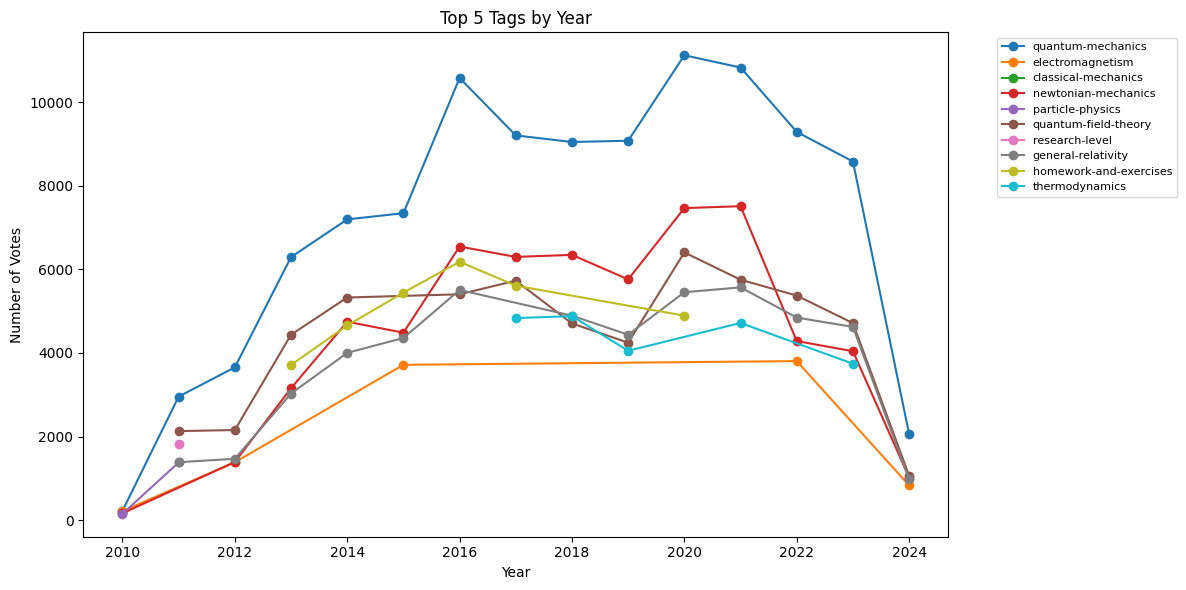

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
posts = pd.read_csv('physics_csv/Posts.csv')
votes = pd.read_csv('physics_csv/Votes.csv')

# 2️⃣ 转换日期格式，并提取年份
votes['CreationDate'] = pd.to_datetime(votes['CreationDate'])
votes['Year'] = votes['CreationDate'].dt.year

# 3️⃣ 提取Posts中的标签（|分隔）
def extract_tags(tag_str):
    if pd.isna(tag_str):
        return []
    return [tag for tag in tag_str.strip('|').split('|') if tag.strip() != '']

posts['TagList'] = posts['Tags'].apply(extract_tags)

# 4️⃣ 合并Votes和Posts（按PostId）
votes_posts = pd.merge(votes, posts, left_on='PostId', right_on='Id', how='inner')

# 5️⃣ 展开标签
votes_posts_exploded = votes_posts.explode('TagList')

# 6️⃣ 统计每年每个标签的投票量
tag_votes_year = votes_posts_exploded.groupby(['Year', 'TagList']).size().reset_index(name='VoteCount')

# 7️⃣ 找出每年 topN 标签
n_top = 5  # 可以改为5
top_tags_per_year = tag_votes_year.sort_values(['Year', 'VoteCount'], ascending=[True, False]).groupby('Year').head(n_top)

# 8️⃣ 输出结果
print(f"每年投票最多的 top{n_top} 标签：")
print(top_tags_per_year)

# 9️⃣ 可视化（可选）：画每年 top 标签及其投票量
plt.figure(figsize=(12,6))
for tag in top_tags_per_year['TagList'].unique():
    tag_data = top_tags_per_year[top_tags_per_year['TagList'] == tag]
    plt.plot(tag_data['Year'], tag_data['VoteCount'], marker='o', label=tag)

plt.title(f'Top {n_top} Tags by Year')
plt.xlabel('Year')
plt.ylabel('Number of Votes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()


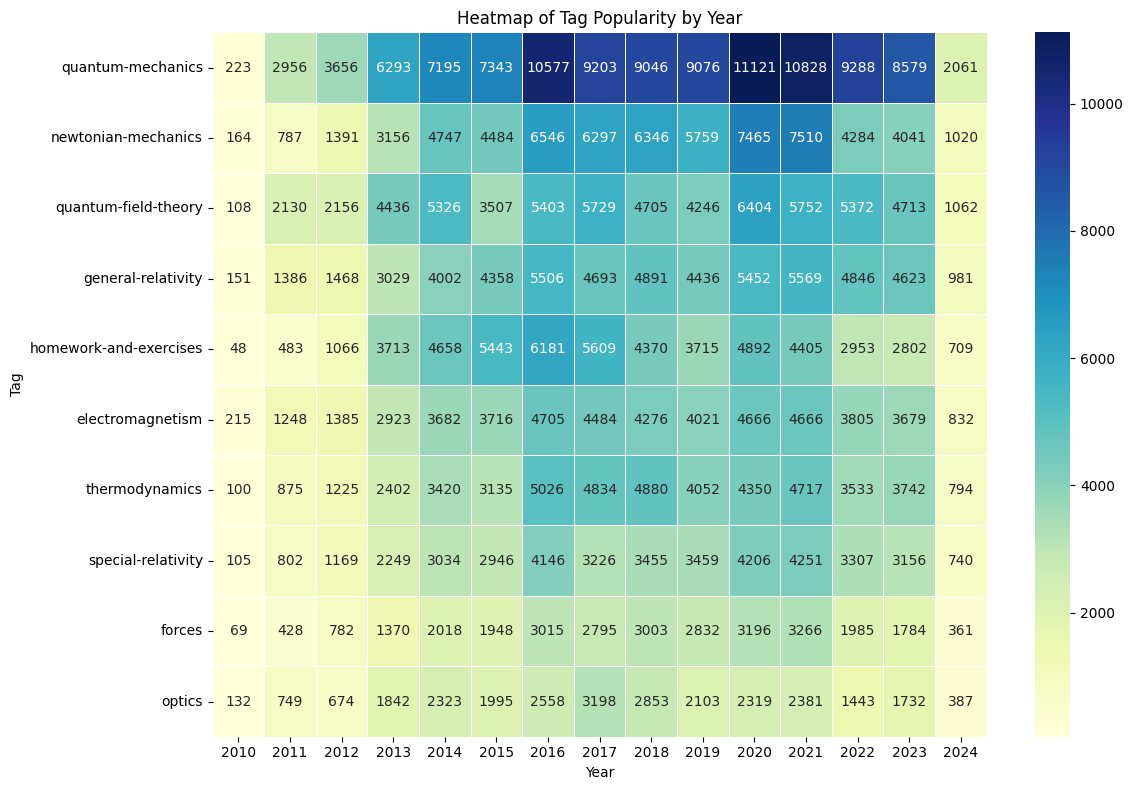

In [ ]:
import seaborn as sns
# 日期处理，提取年份
votes['CreationDate'] = pd.to_datetime(votes['CreationDate'])
votes['Year'] = votes['CreationDate'].dt.year

# 提取标签（按 | 分隔）
def extract_tags(tag_str):
    if pd.isna(tag_str):
        return []
    return [tag for tag in tag_str.strip('|').split('|') if tag.strip() != '']

posts['TagList'] = posts['Tags'].apply(extract_tags)

# 合并votes和posts
votes_posts = pd.merge(votes, posts, left_on='PostId', right_on='Id', how='inner')

# 展开标签
votes_exploded = votes_posts.explode('TagList')

# 统计每年每标签的投票量
tag_votes_year = votes_exploded.groupby(['Year', 'TagList']).size().reset_index(name='VoteCount')

#  透视表（生成年份x标签矩阵）
heatmap_data = tag_votes_year.pivot(index='TagList', columns='Year', values='VoteCount').fillna(0)

#  只取总投票量最多的前N标签（避免标签过多）
top_tags = heatmap_data.sum(axis=1).sort_values(ascending=False).head(10).index
heatmap_data = heatmap_data.loc[top_tags]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=.5, annot=True, fmt='.0f')
plt.title('Heatmap of Tag Popularity by Year')
plt.xlabel('Year')
plt.ylabel('Tag')
plt.tight_layout()
plt.show()

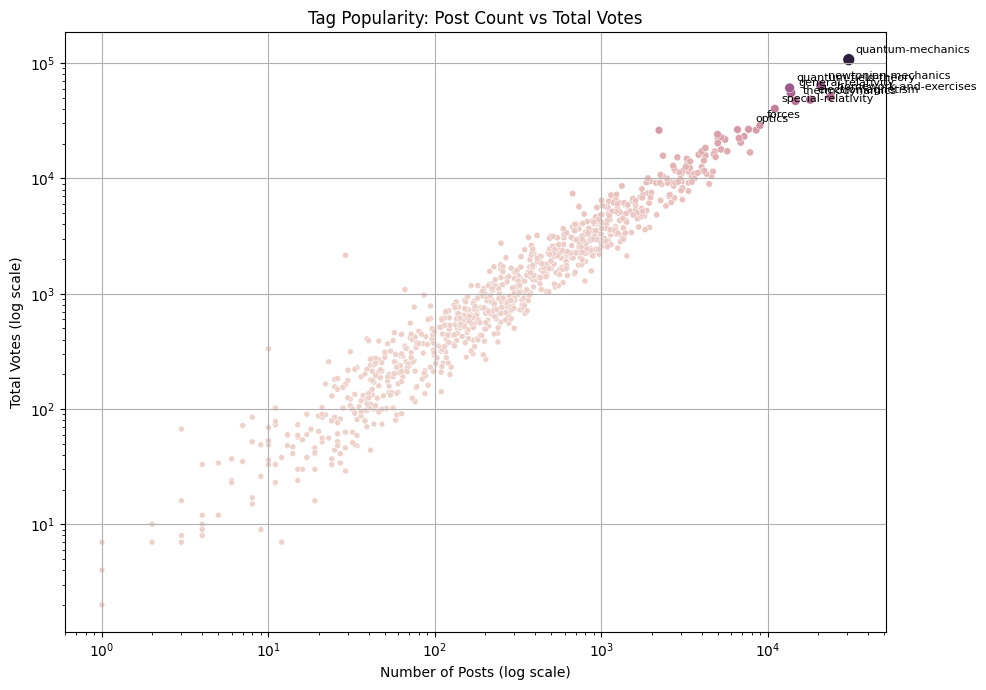

0    [quantum-mechanics, particle-physics, angular-...
1                           [string-theory, education]
2    [particle-physics, group-theory, representatio...
3                                                   []
4                                                   []
5    [quantum-mechanics, quantum-interpretations, h...
6                                                   []
7    [lagrangian-formalism, variational-principle, ...
8                                                   []
9                 [acoustics, terminology, definition]
Name: TagList, dtype: object


In [ ]:
# 2️⃣ 提取标签（按 | 分隔）
def extract_tags(tag_str):
    if pd.isna(tag_str):
        return []
    return [tag for tag in tag_str.strip('|').split('|') if tag.strip() != '']

posts['TagList'] = posts['Tags'].apply(extract_tags)

# 3️⃣ 展开标签
posts_exploded = posts.explode('TagList')

# 4️⃣ 统计标签的帖子数
post_counts = posts_exploded.groupby('TagList').size().reset_index(name='PostCount')

# 5️⃣ 合并Votes和Posts，按PostId关联
votes_posts = pd.merge(votes, posts, left_on='PostId', right_on='Id', how='inner')
votes_exploded = votes_posts.explode('TagList')

# 6️⃣ 统计标签的总投票量
tag_votes = votes_exploded.groupby('TagList').size().reset_index(name='TotalVotes')

# 7️⃣ 合并PostCount和TotalVotes
tag_summary = pd.merge(post_counts, tag_votes, on='TagList', how='outer').fillna(0)

# 8️⃣ 可视化：散点图
plt.figure(figsize=(10,7))
sns.scatterplot(data=tag_summary, x='PostCount', y='TotalVotes', hue='TotalVotes', size='TotalVotes', legend=False)

# 给标签添加注释（只标出高亮标签）
highlight_tags = tag_summary.sort_values(['TotalVotes', 'PostCount'], ascending=[False, False]).head(10)['TagList'].tolist()
for i, row in tag_summary.iterrows():
    if row['TagList'] in highlight_tags:
        plt.annotate(row['TagList'], (row['PostCount'], row['TotalVotes']), textcoords="offset points", xytext=(5,5), ha='left', fontsize=8)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Posts (log scale)')
plt.ylabel('Total Votes (log scale)')
plt.title('Tag Popularity: Post Count vs Total Votes')
plt.grid(True)
plt.tight_layout()
plt.show()

# 9️⃣ 分类标签（逻辑简单版，可自定义阈值）
star_tags = tag_summary[(tag_summary['PostCount'] > tag_summary['PostCount'].median()) & (tag_summary['TotalVotes'] > tag_summary['TotalVotes'].median())]
niche_tags = tag_summary[(tag_summary['PostCount'] < tag_summary['PostCount'].median()) & (tag_summary['TotalVotes'] > tag_summary['TotalVotes'].median())]
unpopular_tags = tag_summary[(tag_summary['PostCount'] > tag_summary['PostCount'].median()) & (tag_summary['TotalVotes'] < tag_summary['TotalVotes'].median())]


In [35]:
print("1. High Posts & High Votes:")
print(star_tags.sort_values(by='TotalVotes', ascending=False).head(10))
print("2. Low Posts & High Votes:")
print(niche_tags.sort_values(by='TotalVotes', ascending=False).head(10))


1. High Posts & High Votes:
                    TagList  PostCount  TotalVotes
647       quantum-mechanics      30572      107445
528     newtonian-mechanics      20738       63997
640    quantum-field-theory      13487       61049
326      general-relativity      13743       55391
377  homework-and-exercises      23709       51047
243        electromagnetism      17941       48303
811          thermodynamics      14633       47085
739      special-relativity      10988       40251
298                  forces       8945       28852
563                  optics       7646       26689
2. Low Posts & High Votes:
               TagList  PostCount  TotalVotes
610    popular-science        249        2745
278                faq         29        2155
299        foundations        248        1783
452               ligo        226        1715
251           elements        248        1658
37       arrow-of-time        213        1564
581         perception        249        1384
877            w

In [36]:
print("3. High Posts & Low Votes:")
print(unpopular_tags.sort_values(by='PostCount', ascending=False).head(10))

3. High Posts & Low Votes:
                 TagList  PostCount  TotalVotes
894               x-rays        363         873
469       magnetostatics        358         712
366          heat-engine        348         677
593      photon-emission        344         792
285       ferromagnetism        338         752
205        dipole-moment        334         797
389            induction        333         885
214         displacement        324         724
516  multipole-expansion        302         880
287         fiber-optics        299         502


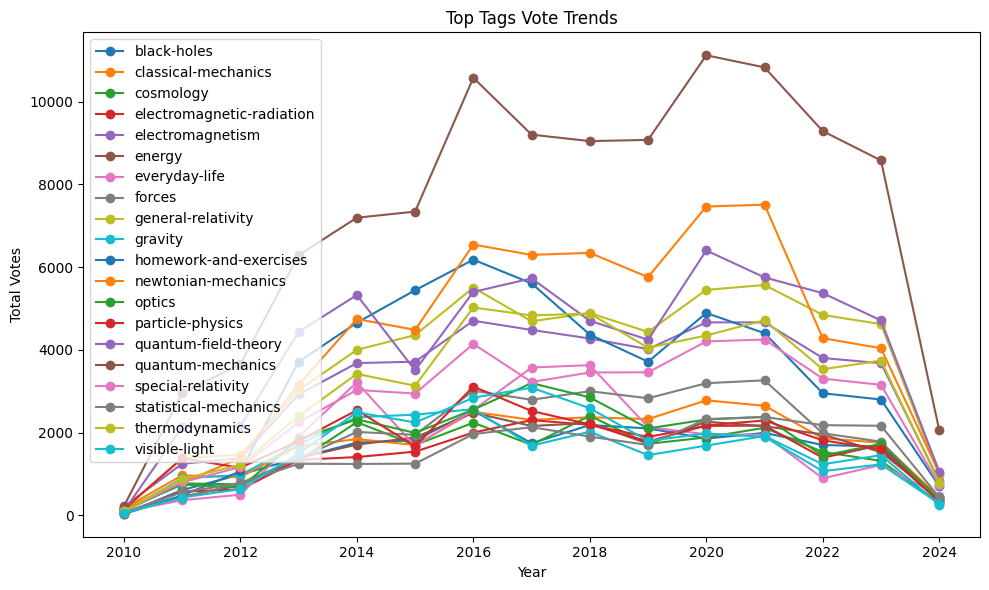

In [23]:
plt.figure(figsize=(10,6))
top_tags = tag_postcount_year['TagList'].unique()  # 或指定标签
for tag in top_tags:
    data = tag_postcount_year[tag_postcount_year['TagList'] == tag]
    plt.plot(data['Year'], data['TotalVotes'], marker='o', label=tag)
plt.title('Top Tags Vote Trends')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
import plotly.express as px
summary = tag_postcount_year.groupby('TagList')['TotalVotes'].sum().reset_index()
fig = px.treemap(summary, path=['TagList'], values='TotalVotes', 
                 title='Tag Distribution by Total Votes')
fig.show()
